# <h2><b> Đồ án thực hành </b></h2>
<h1 style='color:red;text-align:center;font-size:35px'><b>Chủ đề: Dự đoán giá rượu vang</b></h1>

# <h3>Các thành viên trong nhóm</h3>
<li> Phan Xuân Hoài - 20120481 </li>
<li> Lê Kinh Luân - 1612355 </li>
<li> Nguyễn Minh Nghĩa - 20120534</li>
<li> Phạm Quốc Hưng - 19120522</li>

# <h1 style='color:blue;text-align:center;font-size:30px'><b>Phần B</b></h1>

## Import những thư viện cần thiết

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# YOUR CODE HERE (OPTION)
# Nếu cần các thư viện khác thì bạn có thể import ở đây
import re
import statistics
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [76]:
import sys
sys.executable

'd:\\Python\\python.exe'

In [80]:
cd champagne/champagne

C:\Users\PC\Desktop\Into Data Science\Seminar\-NMKHDL_20_21\champagne\champagne


### Đọc file 'champagnes_info.csv' vào dataframe df

In [81]:
df = pd.read_csv('./dataset/champagnes_info.csv')
df.head(20)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,WVN-9400,Rượu Champagne Armand De Brignac Blanc,9.400.000,Pháp\r\n,12.5 %\r\n,750 ML\r\n,Chardonnay\r\n,Màu trắng,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
1,VNHM-1350,Rượu Champagne Arnaud Tabourin,1.350.000,Pháp\r\n,12 %\r\n,750 ML\r\n,Chardonnay\r\n,,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
2,VNHM1-1750,Rượu Champagne Autreau Brut Premier Cru,1.750.000,Pháp\r\n,12 %\r\n,750 ML\r\n,Chardonnay\r\n,NaN,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
3,VNHM1-1850,Rượu Champagne Autreau Reserve Brut Grand Cru,1.850.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay, Pinot Nero\r\n",,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
4,VNTK1-2760,Rượu Champagne Ayala Blanc De Blancs,2.760.000,Pháp\r\n,12 %\r\n,750 ML\r\n,Chardonnay\r\n,Vàng nhạt,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
5,VNTK-2294,Rượu Champagne Ayala Brut Majeur,2.294.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay, Pinot Noir, Pinot Meunier\r\n",Vàng rơm,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
6,VNTK-2734,Rượu Champagne Ayala Brut Nature,2.734.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay, Pinot Noir, Pinot Meunier\r\n",Vàng rơm,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
7,VNPE-1250,Rượu Champagne Bernard Lonclas Blanc,1.250.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay, Pinot Noir, Pinot Meunier\r\n",Vàng rơm,"Rượu Champagne, Rượu Vang Trắng\r\n",NaN,NaN
8,VNWH1-4200,Rượu Champagne Billecart Salmon Blanc De Blancs,2.709.000,Pháp\r\n,12.5 %\r\n,750 ML\r\n,Chardonnay\r\n,NaN,Rượu Champagne\r\n,NaN,NaN
9,VNWH1-2750,Rượu Champagne Billecart Salmon Brut Réserve,1.895.000,Pháp\r\n,12.5 %\r\n,750 ML\r\n,"Chardonnay, Pinot Noir, Pinot Meunier\r\n",Màu vàng rơm,Rượu Champagne\r\n,NaN,NaN


# Khám phá dữ liệu

### Xem số dòng cột của dữ liệu 

In [82]:
num_rows = df.shape[0]
num_cols = df.shape[1]
shape = (num_rows, num_cols)
shape

(1953, 11)

### Kiểu dữ liệu của các cột 

In [83]:
df.dtypes

Ma_sp            object
Ten_sp           object
Gia              object
Xuat_xu          object
Nong_do          object
Dung_tich        object
Giong_nho        object
Mau_sac          object
Loai_ruou        object
Thuong_hieu      object
Vung_lam_vang    object
dtype: object

### Ý nghĩa của các cột

Đọc file "champagnes_schema.csv" vào DataFrame `col_meaning_df`

In [84]:
temp = pd.read_csv("./dataset/champagnes_schema.csv")
temp
data = {
    "name": temp["name"],
    "mean": temp["mean"]
}
pd.set_option('max_colwidth', 400)


col_meaning_df = pd.DataFrame(data = data)
col_meaning_df = col_meaning_df.set_index(['name'])

In [85]:
col_meaning_df

,mean
name,
Ma_sp,Ma san pham
Ten_sp,Ten ruou
Gia,Gia tien san pham
Xuat_xu,Xuat xu cua ruou(quoc gia)
Nong_do,Nong do cua ruou
Dung_tich,Dung tich chai ruou
Giong_nho,Giong nho lam ruou
Mau_sac,Mau sac cua ruou
Loai_ruou,San pham thuoc loai ruou nao


# Tiền xử lý

Loại bỏ các ký tự '\n' trong các cột 'Xuat_xu', 'Giong_nho','Loai_ruou','Thuong_hieu'

In [86]:
def is_nan(x):
    return (x != x)

In [87]:
ds_xuat_xu = df["Xuat_xu"].values.tolist()
ds_giong_nho = df['Giong_nho'].values.tolist()
ds_loai_ruou = df['Loai_ruou'].values.tolist()
ds_thuong_hieu = df['Thuong_hieu'].values.tolist()

for i in range(0,num_rows):
    if(is_nan(ds_xuat_xu[i]) == False):
        ds_xuat_xu[i] = ds_xuat_xu[i][0:(len(ds_xuat_xu[i]) - 2)]
        
    if(is_nan(ds_giong_nho[i]) == False):
        ds_giong_nho[i] = ds_giong_nho[i][0:(len(ds_giong_nho[i]) - 2)]
        
    if(is_nan(ds_loai_ruou[i]) == False):
        ds_loai_ruou[i] = ds_loai_ruou[i][0:(len(ds_loai_ruou[i]) - 2)]
        
    if(is_nan(ds_thuong_hieu[i]) == False):
        ds_thuong_hieu[i] = ds_thuong_hieu[i][0:(len(ds_thuong_hieu[i]) - 2)]
        
index = [i for i in range(0,shape[0])]
df['Xuat_xu'] = pd.Series(ds_xuat_xu, index = index)
df['Giong_nho'] = pd.Series(ds_giong_nho, index = index)
df['Loai_ruou'] = pd.Series(ds_loai_ruou, index = index)
df['Thuong_hieu'] = pd.Series(ds_thuong_hieu, index = index)

Chuyển kiểu dữ liệu của các cột 'Dung_tich', 'Nong_do','Gia' về dạng số

In [88]:
ds_dung_tich = df["Dung_tich"].values.tolist()
ds_nong_do = df['Nong_do'].values.tolist()

for i in range(0,num_rows):
    if(is_nan(ds_dung_tich[i]) == False):
        ds_dung_tich[i] = ds_dung_tich[i][0:(len(ds_dung_tich[i]) - 5)]
        
    if(is_nan(ds_nong_do[i]) == False):
        ds_nong_do[i] = ds_nong_do[i][0:(len(ds_nong_do[i]) - 4)]

df['Dung_tich'] = pd.Series(ds_dung_tich, index = index)
df['Nong_do'] = pd.Series(ds_nong_do, index = index)

df['Nong_do'] = pd.to_numeric(df['Nong_do'], errors='coerce')
df['Dung_tich'] = pd.to_numeric(df['Dung_tich'], downcast='float', errors='coerce')
df['Gia'] = df['Gia'].replace('[.]', '', regex=True).astype(float)

In [89]:
df.dtypes

Ma_sp             object
Ten_sp            object
Gia              float64
Xuat_xu           object
Nong_do          float64
Dung_tich        float32
Giong_nho         object
Mau_sac           object
Loai_ruou         object
Thuong_hieu       object
Vung_lam_vang     object
dtype: object

In [90]:
df.head(20)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,WVN-9400,Rượu Champagne Armand De Brignac Blanc,9400000.0,Pháp,12.5,750.0,Chardonnay,Màu trắng,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
1,VNHM-1350,Rượu Champagne Arnaud Tabourin,1350000.0,Pháp,12.0,750.0,Chardonnay,,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
2,VNHM1-1750,Rượu Champagne Autreau Brut Premier Cru,1750000.0,Pháp,12.0,750.0,Chardonnay,NaN,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
3,VNHM1-1850,Rượu Champagne Autreau Reserve Brut Grand Cru,1850000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Nero",,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
4,VNTK1-2760,Rượu Champagne Ayala Blanc De Blancs,2760000.0,Pháp,12.0,750.0,Chardonnay,Vàng nhạt,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
5,VNTK-2294,Rượu Champagne Ayala Brut Majeur,2294000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",Vàng rơm,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
6,VNTK-2734,Rượu Champagne Ayala Brut Nature,2734000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",Vàng rơm,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
7,VNPE-1250,Rượu Champagne Bernard Lonclas Blanc,1250000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",Vàng rơm,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
8,VNWH1-4200,Rượu Champagne Billecart Salmon Blanc De Blancs,2709000.0,Pháp,12.5,750.0,Chardonnay,NaN,Rượu Champagne,NaN,NaN
9,VNWH1-2750,Rượu Champagne Billecart Salmon Brut Réserve,1895000.0,Pháp,12.5,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",Màu vàng rơm,Rượu Champagne,NaN,NaN


## Quay lại bước khám phá dữ liệu 

Với các cột có kiểu dữ liệu số, ta cần tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Sau đó lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [91]:
items = ["Gia","Nong_do","Dung_tich"]
percentMissingList = []
for item in items:
   percentMissingList.append(round(df[item].apply(is_nan).tolist().count(1)/shape[0] * 100,1))

percentMissingList

columns = ["Gia","Nong_do","Dung_tich"]
row_labels = ["missing_ratio","min","lower_quartile","median","upper_quartile","max"]
temp = df[["Gia","Nong_do","Dung_tich"]]
info_df = temp.quantile(q=[0.25,0.5, 0.75], axis=0, numeric_only=True, interpolation='midpoint')
max = round(temp.max(axis = 0),1)
min = round(temp.min(axis = 0),1)

data = [percentMissingList,min,info_df.loc[0.25].tolist(),info_df.loc[0.5].tolist(),info_df.loc[0.75].tolist(),max]
num_col_info_df = pd.DataFrame(data = data, index = row_labels, columns = columns)
num_col_info_df

,Gia,Nong_do,Dung_tich
missing_ratio,19.3,0.1,0.0
min,1.0,4.5,187.0
lower_quartile,400000.0,13.0,750.0
median,720000.0,13.5,750.0
upper_quartile,1467000.0,14.0,750.0
max,39000000.0,42.0,1500.0


### Tiền xử lý

Xử lý chuỗi của cột "Màu sắc" thành chuỗi viết thường (Vd: ở cột màu săc có "Vàng Rơm", "Vàng rơm"... thì chuyển thành "vàng rơm"), xóa khoảng trắng đầu và cuối, đồng bộ ký tự màu sắc ("màu vàng rơm", "vàng rơm" --> "vàng rơm")

In [92]:
df['Mau_sac'] = df['Mau_sac'].str.lower()
df['Mau_sac'] = df['Mau_sac'].str.strip()

df = df.apply(lambda x: x.replace({'màu':'', ': ':'','vàng':'vàng','đỏ':'đỏ'}, regex=True))
df['Mau_sac'] = df['Mau_sac'].str.strip()


In [93]:
df.head(20)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,WVN-9400,Rượu Champagne Armand De Brignac Blanc,9400000.0,Pháp,12.5,750.0,Chardonnay,trắng,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
1,VNHM-1350,Rượu Champagne Arnaud Tabourin,1350000.0,Pháp,12.0,750.0,Chardonnay,,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
2,VNHM1-1750,Rượu Champagne Autreau Brut Premier Cru,1750000.0,Pháp,12.0,750.0,Chardonnay,NaN,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
3,VNHM1-1850,Rượu Champagne Autreau Reserve Brut Grand Cru,1850000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Nero",,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
4,VNTK1-2760,Rượu Champagne Ayala Blanc De Blancs,2760000.0,Pháp,12.0,750.0,Chardonnay,vàng nhạt,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
5,VNTK-2294,Rượu Champagne Ayala Brut Majeur,2294000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",vàng rơm,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
6,VNTK-2734,Rượu Champagne Ayala Brut Nature,2734000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",vàng rơm,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
7,VNPE-1250,Rượu Champagne Bernard Lonclas Blanc,1250000.0,Pháp,12.0,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",vàng rơm,"Rượu Champagne, Rượu Vang Trắng",NaN,NaN
8,VNWH1-4200,Rượu Champagne Billecart Salmon Blanc De Blancs,2709000.0,Pháp,12.5,750.0,Chardonnay,NaN,Rượu Champagne,NaN,NaN
9,VNWH1-2750,Rượu Champagne Billecart Salmon Brut Réserve,1895000.0,Pháp,12.5,750.0,"Chardonnay, Pinot Noir, Pinot Meunier",vàng rơm,Rượu Champagne,NaN,NaN


## Quay lại bước khám phá dữ liệu 

Với các cột "Xuat_xu","Giong_nho","Mau_sac","Thuong_hieu" ta cần tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "Giong_nho"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu phẩy)
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu)

Lưu kết quả vào DataFrame `cat_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [94]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn

temp = df[["Xuat_xu","Giong_nho","Mau_sac","Thuong_hieu"]]
items = ["Xuat_xu","Giong_nho","Mau_sac","Thuong_hieu"]


percentMissingList = []
for item in items:
   percentMissingList.append(round(df[item].apply(is_nan).tolist().count(1)/len(df) * 100,1))

columns = temp.columns.tolist()
row_labels = ["missing_ratio", "num_values", "value_ratios"]

num_values_list = []
for k in range (0,len(items)):
    s = temp[items[k]].tolist()
    s_split = []
    for i in range(0,len(s)):
        if is_nan(s[i]) == 0:
            s_split.append(re.split(', ',s[i]))

    l = pd.Series(s_split).explode().tolist()
    l = [*set(l)]
    num_values_list.append(len(l))
        

list_dic = []

for k in range (0,len(items)):
    s = temp[items[k]].tolist()
    s_split = []
    for i in range(0,len(s)):
        if is_nan(s[i]) == 0:
            s_split.append(re.split(', ',s[i]))

    l = pd.Series(s_split).explode()
    a = l.value_counts()
    dic = round(a/a.sum()*100,1).to_dict()
    list_dic.append(dic)       

data = [percentMissingList, num_values_list, list_dic]
cat_col_info_df = pd.DataFrame(data = data, index = row_labels, columns = columns)

In [95]:
cat_col_info_df

,Xuat_xu,Giong_nho,Mau_sac,Thuong_hieu
missing_ratio,0.0,2.8,14.3,62.4
num_values,17,64,144,124
value_ratios,"{'Pháp': 47.2, 'Chile': 19.5, 'Ý': 16.4, 'Mỹ': 4.7, 'Argentina': 3.9, 'Tây Ban Nha': 2.5, 'ÚC': ...","{'Cabernet Sauvignon': 18.3, 'Merlot': 14.7, 'Chardonnay': 9.0, 'Cabernet Franc': 7.5, 'Pinot No...","{'đỏ ruby': 41.9, 'vàng rơm': 11.9, 'đỏ': 9.0, 'đỏ đậm': 8.3, 'vàng nhạt': 4.9, '': 1.9, 'đỏ rub...","{'Concha Y Toro': 5.2, 'Albert Bichot': 3.7, 'Chateau Los Boldos': 2.6, 'Carmen': 2.4, 'Bisquert..."


### Trực quan một vài biểu đồ để có một cái nhìn tổng quan hơn về dữ liệu

Lấy ra các cột kiểu numeric

In [96]:
numeric_cols = df.select_dtypes('number').columns.tolist()
numeric_cols

['Gia', 'Nong_do', 'Dung_tich']

Biểu đồ boxplot của từng cột có kiểu dữ liệu numeric

C:\Users\PC\AppData\Local\Temp\ipykernel_8568\2615322929.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{}'.format(x) for x in ax.get_xticks()/1e6])


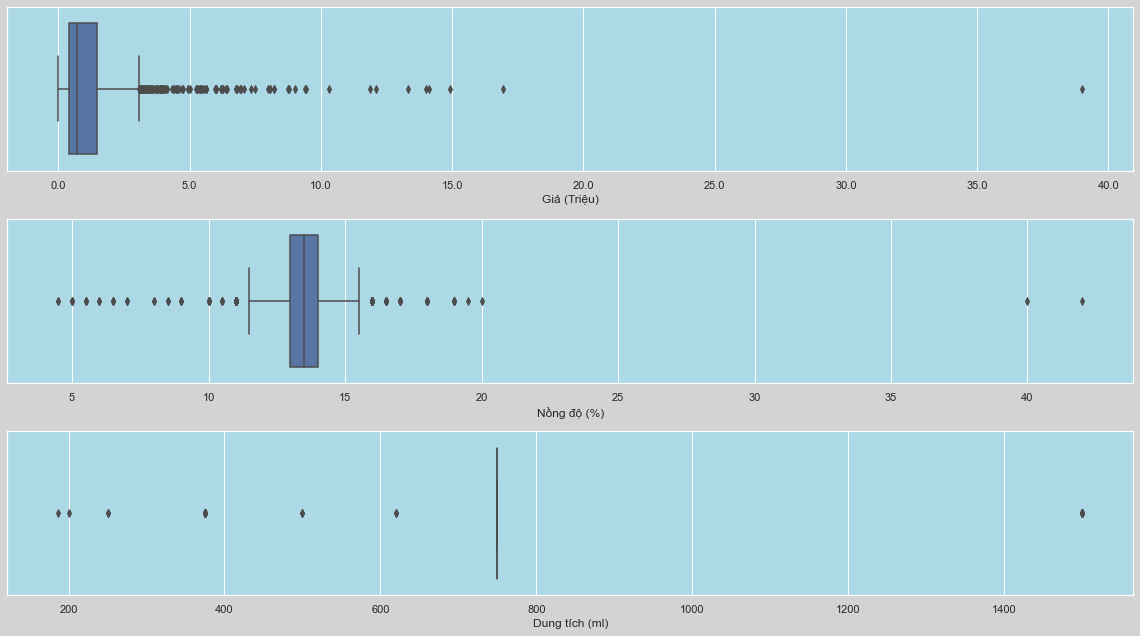

In [97]:
pretty_labels = {
  'Gia' : 'Giá (Triệu)',
  'Nong_do' : 'Nồng độ (%)',
  'Dung_tich' : 'Dung tích (ml)'
}
fig, axes = plt.subplots(3,1, figsize = (16,9))
for i,ax in enumerate(axes.flat):
  sns.boxplot(data = df, x = numeric_cols[i], ax = ax)
  ax.set_xlabel(pretty_labels[numeric_cols[i]])
  if i == 0:
    ax.set_xticklabels(['{}'.format(x) for x in ax.get_xticks()/1e6])

plt.tight_layout()

Nhìn chung, giá trị của các cột dữ liệu kiểu số đều không phân bố rộng mà chỉ tập trung vào một khoảng giá trị nhỏ cũng như xuất hiện nhiều ngoại lệ.

Xem xét thử mối quan hệ giữa giá với nồng độ và dung tích

C:\Users\PC\AppData\Local\Temp\ipykernel_8568\2707811462.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])
C:\Users\PC\AppData\Local\Temp\ipykernel_8568\2707811462.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])


Text(0, 0.5, 'Dung tích (ml)')

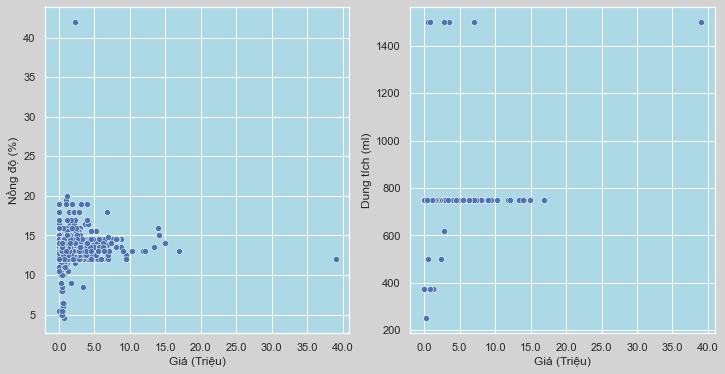

In [98]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.scatterplot(data = df, x = 'Gia', y = 'Nong_do', ax = axes[0])
sns.scatterplot(data = df, x = 'Gia', y = 'Dung_tich', ax = axes[1])
axes[0].set_xlabel(pretty_labels['Gia'])
axes[0].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])
axes[0].set_ylabel(pretty_labels['Nong_do'])
axes[1].set_xlabel(pretty_labels['Gia'])
axes[1].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])
axes[1].set_ylabel(pretty_labels['Dung_tich'])

Có vẻ là giá rượu không hề có mối liên hệ gì với nồng độ hay dung tích

Những quốc gia được nhập rượu về nhiều nhất

<AxesSubplot:xlabel='Số lượng sản phẩm', ylabel='Xuất xứ'>

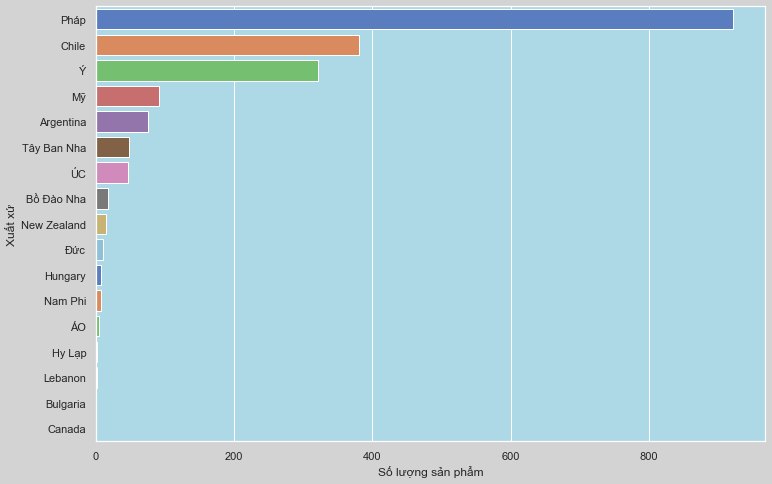

In [99]:
origin_count_df = df['Xuat_xu'].value_counts().to_frame(name = 'Số lượng sản phẩm').reset_index()
origin_count_df = origin_count_df.rename(columns = {'index' : 'Xuất xứ'})
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data = origin_count_df, x = 'Số lượng sản phẩm', y = 'Xuất xứ', orient = 'h', palette = 'muted', ax = ax)